In [295]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.options.display.max_colwidth = 100
plt.style.use('ggplot')

In [296]:
df_raw = pd.read_csv('ames_house_price_processed2.csv', index_col=0, na_filter=False)
df = df_raw.copy()
df.head()

pid  gr_liv_area  sale_price  ms_sub_class ms_zoning  lot_frontage  \
0  909176150          856      126000            30        RL          80.0   
1  905476230         1049      139500           120        RL          42.0   
2  911128020         1001      124900            30   C (all)          60.0   
3  535377150         1039      114000            70        RL          80.0   
4  534177230         1665      227000            60        RL          70.0   

   lot_area street alley lot_shape land_contour utilities lot_config  \
0      7890   Pave    NA       Reg          Lvl    AllPub     Corner   
1      4235   Pave    NA       Reg          Lvl    AllPub     Inside   
2      6060   Pave    NA       Reg          Lvl    AllPub     Inside   
3      8146   Pave    NA       Reg          Lvl    AllPub     Corner   
4      8400   Pave    NA       Reg          Lvl    AllPub     Inside   

  land_slope neighborhood condition1 condition2 bldg_type house_style  \
0        Gtl        SWISU       Norm       Norm      1Fam      1Story   
1        Gtl      Edwards       Norm       Norm    TwnhsE      1Story   
2        Gtl       IDOTRR       Norm       Norm      1Fam      1Story   
3        Gtl      OldTown       Norm       Norm      1Fam      2Story   
4        Gtl       NWAmes       Norm       Norm      1Fam      2Story   

   overall_qual  overall_cond  year_built  year_remod_add roof_style  \
0             6             6        1939            1950      Gable   
1             5             5        1984            1984      Gable   
2             5             9        1930            2007        Hip   
3             4             8        1900            2003      Gable   
4             8             6        2001            2001      Gable   

  roof_matl exterior1st exterior2nd mas_vnr_type  mas_vnr_area exter_qual  \
0   CompShg     Wd Sdng     Wd Sdng         None           0.0         TA   
1   CompShg     HdBoard     HdBoard      BrkFace         149.0         Gd   
2   CompShg     MetalSd     MetalSd         None           0.0         Gd   
3   CompShg     MetalSd     MetalSd         None           0.0         Gd   
4   CompShg     VinylSd     VinylSd         None           0.0         Gd   

  exter_cond foundation bsmt_qual bsmt_cond bsmt_exposure bsmt_fin_type1  \
0         TA     CBlock        TA        TA            No            Rec   
1         TA     CBlock        Gd        TA            Mn            GLQ   
2         TA     BrkTil        TA        TA            No            ALQ   
3         Gd     BrkTil        Fa        TA            No            Unf   
4         TA      PConc        Gd        TA            No            GLQ   

   bsmt_fin_sf1 bsmt_fin_type2  bsmt_fin_sf2  bsmt_unf_sf  total_bsmt_sf  \
0         238.0            Unf           0.0        618.0          856.0   
1         552.0            ALQ         393.0        104.0         1049.0   
2         737.0            Unf           0.0        100.0          837.0   
3           0.0            Unf           0.0        405.0          405.0   
4         643.0            Unf           0.0        167.0          810.0   

  heating heating_qc central_air electrical  1st_flr_sf  2nd_flr_sf  \
0    GasA         TA           Y      SBrkr         856           0   
1    GasA         TA           Y      SBrkr        1049           0   
2    GasA         Ex           Y      SBrkr        1001           0   
3    GasA         Gd           Y      SBrkr         717         322   
4    GasA         Ex           Y      SBrkr         810         855   

   low_qual_fin_sf  bsmt_full_bath  bsmt_half_bath  full_bath  half_bath  \
0                0             1.0             0.0          1          0   
1                0             1.0             0.0          2          0   
2                0             0.0             0.0          1          0   
3                0             0.0             0.0          1          0   
4                0             1.0           

# Encoding Ordinal Variables

In [297]:
df['kitchen_qual'].value_counts()

TA    1356
Gd    1017
Ex     141
Fa      62
Po       1
Name: kitchen_qual, dtype: int64

In [298]:
# create dictionary to store ordinal replacement values
dict_ordinal = {}

In [299]:
# function for analysis
def ordinal(df, col):
    sns.countplot(data=df, y = col)
    plt.show()
    sns.stripplot(data=df, y = col, x=df.log_sale_price, alpha=0.5)

## Lot Shape

In [300]:
# get values
keys = df.lot_shape.unique().tolist()
keys

['Reg', 'IR1', 'IR3', 'IR2']

In [301]:
# assign to dict
vals = [4, 3, 1, 2]
for key, val in zip(keys, vals):
    dict_ordinal[key] = val

In [302]:
# replace values
df.replace({'lot_shape':dict_ordinal}, inplace=True)

## Overall Qual/Condition

In [303]:
print(df['overall_qual'].value_counts())
print(df['overall_cond'].value_counts())

5     752
6     669
7     525
8     290
4     195
9      80
3      32
10     19
2      12
1       3
Name: overall_qual, dtype: int64
5    1401
6     497
7     360
8     140
4      88
9      41
3      39
2       7
1       4
Name: overall_cond, dtype: int64


No action necessary
## Qual/Cond (NA, Po, Fa, TA, Gd, Ex)

In [304]:
keys = np.unique(df[['exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', \
           'heating_qc', 'kitchen_qual', 'fireplace_qu', 'garage_qual', \
           'garage_cond', 'pool_qc']].values).tolist()
keys

['Ex', 'Fa', 'Gd', 'NA', 'Po', 'TA']

In [305]:
# assign to dict
vals = [5, 2, 4, 0, 1, 3]
for key, val in zip(keys, vals):
    dict_ordinal[key] = val

In [306]:
# replace values
for i in ['exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', \
           'heating_qc', 'kitchen_qual', 'fireplace_qu', 'garage_qual', \
           'garage_cond', 'pool_qc']:
    df.replace({i:dict_ordinal}, inplace=True)

## Basement Exposure

In [307]:
# get values
keys = df.bsmt_exposure.unique().tolist()
keys

['No', 'Mn', 'NA', 'Gd', 'Av']

In [308]:
# assign to dict
vals = [1, 2, 0, 4, 3]
for key, val in zip(keys, vals):
    dict_ordinal[key] = val

In [309]:
# replace values
df.replace({'bsmt_exposure':dict_ordinal}, inplace=True)

## Bsmt Fin Type

In [310]:
# get values
keys = np.unique(df[['bsmt_fin_type1', 'bsmt_fin_type2']].values).tolist()
keys

['ALQ', 'BLQ', 'GLQ', 'LwQ', 'NA', 'Rec', 'Unf']

In [311]:
# assign to dict
vals = [5, 4, 6, 2, 0, 3, 1]
for key, val in zip(keys, vals):
    dict_ordinal[key] = val

In [312]:
# replace values
df.replace({'bsmt_fin_type1':dict_ordinal}, inplace=True)
df.replace({'bsmt_fin_type2':dict_ordinal}, inplace=True)

## Functional

In [313]:
# get values
keys = df.functional.unique().tolist()
keys

['Typ', 'Min2', 'Min1', 'Mod', 'Sal', 'Maj1', 'Maj2']

In [314]:
# assign to dict
vals = [7, 5, 6, 4, 1, 3, 2]
for key, val in zip(keys, vals):
    dict_ordinal[key] = val

In [315]:
# replace values
df.replace({'functional':dict_ordinal}, inplace=True)

## Utilities

In [316]:
# get values
keys = df.utilities.unique().tolist()
keys

['AllPub', 'NoSewr']

In [317]:
# assign to dict
vals = [2, 1]
for key, val in zip(keys, vals):
    dict_ordinal[key] = val

In [318]:
# replace values
df.replace({'utilities':dict_ordinal}, inplace=True)

## Land Slope

In [319]:
# get values
keys = df.land_slope.unique().tolist()
keys

['Gtl', 'Mod', 'Sev']

In [320]:
# assign to dict
vals = [3, 2, 1]
for key, val in zip(keys, vals):
    dict_ordinal[key] = val

In [321]:
# replace values
df.replace({'land_slope':dict_ordinal}, inplace=True)

## Electrical

In [322]:
# get values
keys = df.electrical.unique().tolist()
keys

['SBrkr', 'FuseF', 'FuseA', 'FuseP']

In [323]:
# assign to dict
vals = [4, 2, 3, 1]
for key, val in zip(keys, vals):
    dict_ordinal[key] = val

In [324]:
# replace values
df.replace({'electrical':dict_ordinal}, inplace=True)

## Garage Finish

In [325]:
# get values
keys = df.garage_finish.unique().tolist()
keys

['Unf', 'Fin', 'RFn', 'NA']

In [326]:
# assign to dict
vals = [1, 3, 2, 0]
for key, val in zip(keys, vals):
    dict_ordinal[key] = val

In [327]:
# replace values
df.replace({'garage_finish':dict_ordinal}, inplace=True)

## Paved Drive

In [328]:
# get values
keys = df.paved_drive.unique().tolist()
keys

['Y', 'N', 'P']

In [329]:
# assign to dict
vals = [3, 1, 2]
for key, val in zip(keys, vals):
    dict_ordinal[key] = val

In [330]:
# replace values
df.replace({'paved_drive':dict_ordinal}, inplace=True)

## Fence

In [331]:
# get values
keys = df.fence.unique().tolist()
keys

['NA', 'GdWo', 'MnPrv', 'GdPrv', 'MnWw']

In [332]:
# assign to dict
vals = [0, 2, 3, 4, 1]
for key, val in zip(keys, vals):
    dict_ordinal[key] = val

In [333]:
# replace values
df.replace({'fence':dict_ordinal}, inplace=True)

In [334]:
df.head().shape

(5, 81)

# Nominal Variables

In [335]:
# function for analysis
def nominal(col, height=2.5, aspect=3):
    print(df[col].value_counts())
    sns.catplot(kind='count', data=df, y = col, height=height, aspect=aspect)
    plt.show()
    sns.catplot(kind='strip', data=df, y = col, x='log_sale_price', alpha=0.5, height=height, aspect=aspect)
    plt.show()

## Street

Pave    2567
Grvl      10
Name: street, dtype: int64


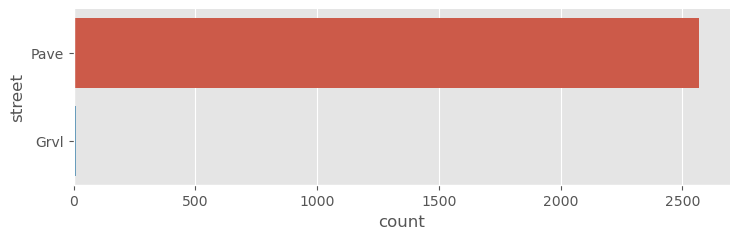

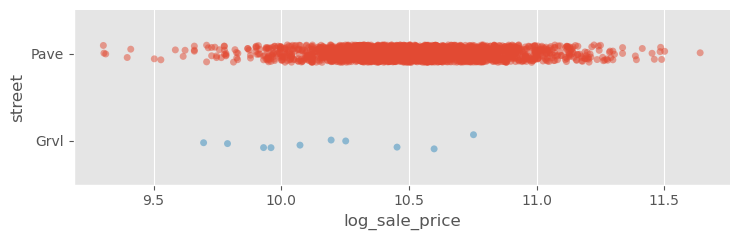

In [336]:
nominal('street')

convert this to binary

In [337]:
df['street_grvl'] = np.where(df['street'] == 'Grvl', 1, 0)
df.drop('street', axis=1, inplace=True)

## Alley

NA      2409
Grvl     105
Pave      63
Name: alley, dtype: int64


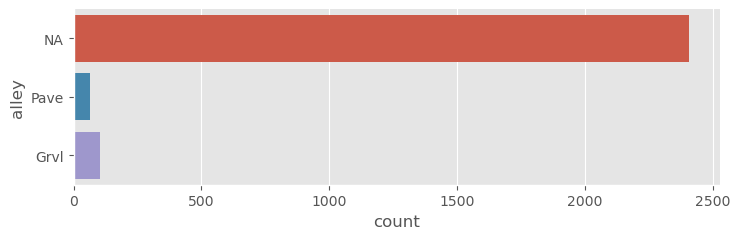

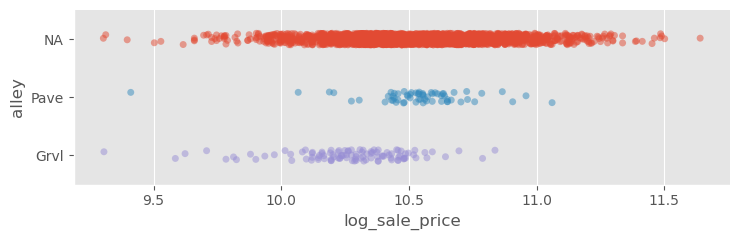

In [338]:
nominal('alley')

In [339]:
alley_dum = pd.get_dummies(df.alley).drop('NA', axis=1)
alley_dum.columns = ['alley_grvl', 'alley_pave']
df = pd.concat([df, alley_dum], axis=1).drop('alley', axis=1)

## Land Contour

Lvl    2336
HLS      95
Bnk      94
Low      52
Name: land_contour, dtype: int64


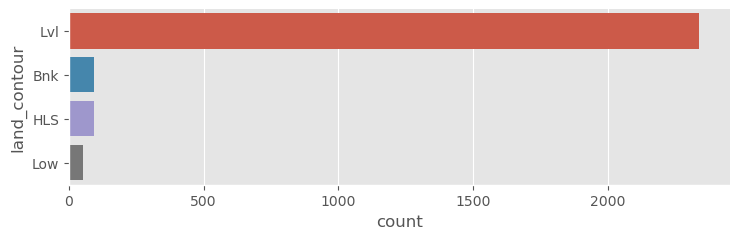

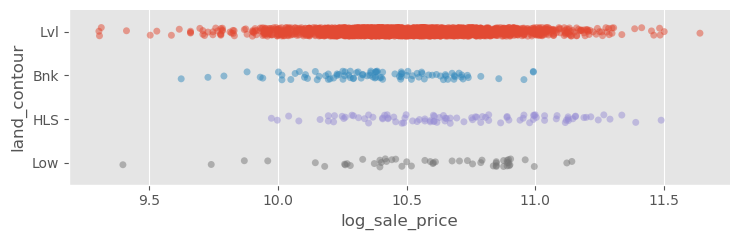

In [340]:
nominal('land_contour')

In [341]:
land_contour_dum = pd.get_dummies(df.land_contour).drop('Lvl', axis=1)
land_contour_dum.columns = ['land_contour_bnk', 'land_contour_hls', 'land_contour_low']
df = pd.concat([df, land_contour_dum], axis=1).drop('land_contour', axis=1)

## Lot Config

Inside     1883
Corner      439
CulDSac     164
FR2          78
FR3          13
Name: lot_config, dtype: int64


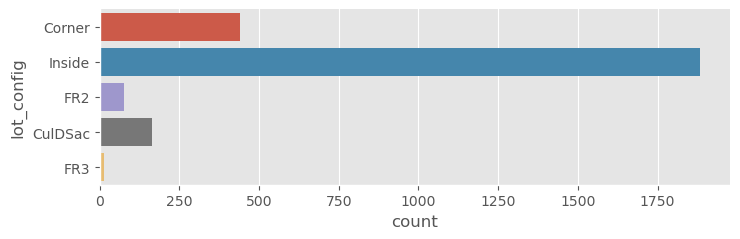

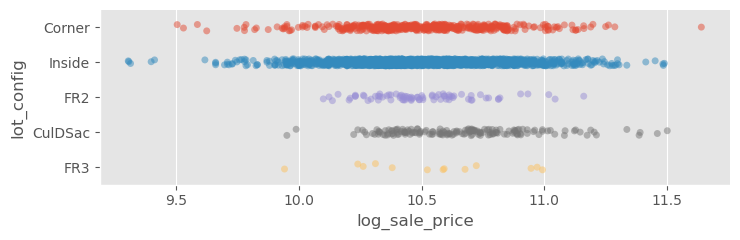

In [342]:
nominal('lot_config')

In [343]:
lot_config_dum = pd.get_dummies(df.lot_config).drop('Inside', axis=1)
lot_config_dum.columns = ['lot_config_corner', 'lot_config_culdsac', 'lot_config_fr2', 'lot_config_fr3']
df = pd.concat([df, lot_config_dum], axis=1).drop('lot_config', axis=1)

## Neighborhood

NAmes      410
CollgCr    236
OldTown    212
Edwards    164
Somerst    143
Gilbert    143
Sawyer     139
NWAmes     123
NridgHt    121
SawyerW    113
Mitchel    104
BrkSide    103
Crawfor     92
IDOTRR      76
NoRidge     67
Timber      54
StoneBr     43
SWISU       42
ClearCr     40
MeadowV     34
BrDale      29
Blmngtn     23
Veenker     23
NPkVill     22
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: neighborhood, dtype: int64


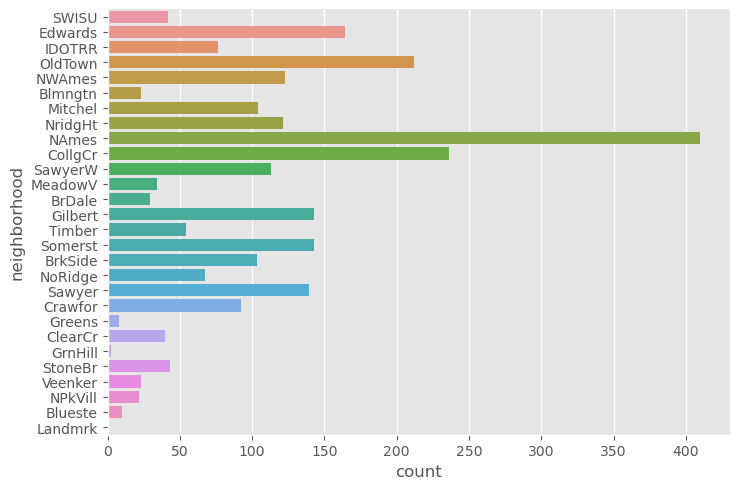

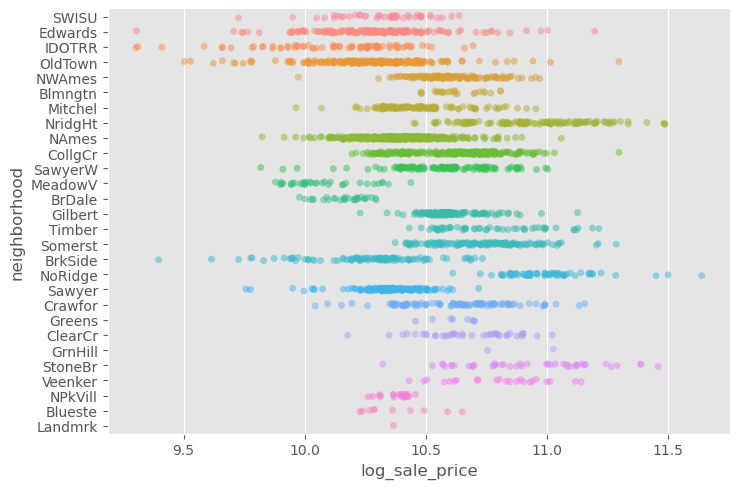

In [344]:
nominal('neighborhood', height=5, aspect=1.5)

In [345]:
df = pd.concat([df, get_dum(df, 'neighborhood', 'NAmes')], axis=1).drop('neighborhood', axis=1)

## Condition 1 and 2

In [346]:
df[['condition1', 'condition2']].value_counts()

condition1  condition2
Norm        Norm          2226
Feedr       Norm           129
Artery      Norm            79
PosN        Norm            34
RRAn        Norm            32
RRAe        Norm            26
PosA        Norm            17
RRAn        Feedr            8
RRNn        Norm             6
RRNe        Norm             4
Feedr       Feedr            3
            RRNn             2
PosA        PosA             2
PosN        PosN             2
Feedr       RRAn             1
            RRAe             1
            Artery           1
Artery      PosA             1
RRNn        Artery           1
            Feedr            1
Artery      Artery           1
dtype: int64

Norm      2226
Feedr      137
Artery      81
RRAn        40
PosN        36
RRAe        26
PosA        19
RRNn         8
RRNe         4
Name: condition1, dtype: int64


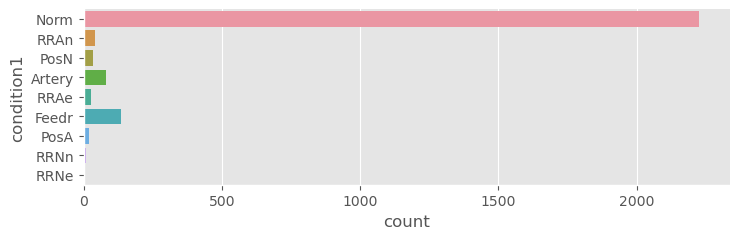

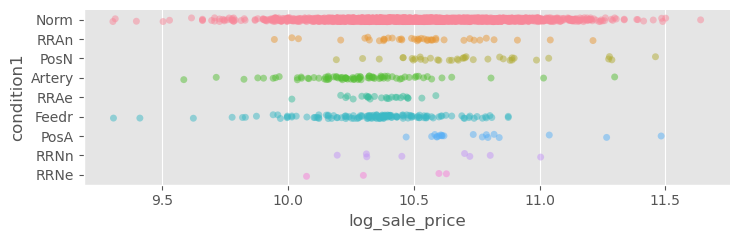

In [347]:
nominal('condition1')

Norm      2553
Feedr       12
Artery       3
PosA         3
PosN         2
RRNn         2
RRAn         1
RRAe         1
Name: condition2, dtype: int64


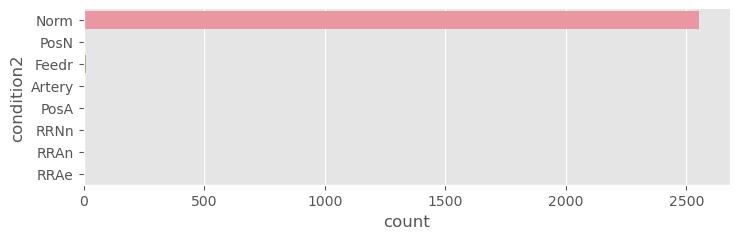

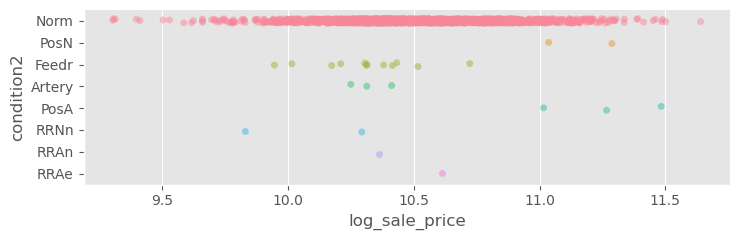

In [348]:
nominal('condition2')

Consolidate to reduce dimensionality

In [349]:
rr = ['RRAn','RRAe', 'RRNn', 'RRNe']
mr = ['Feedr', 'Artery']
pos = ['PosA', 'PosN']

df['near_rr'] = np.where((df['condition1'].isin(rr)) | \
                         (df['condition2'].isin(rr)), 1, 0)

df['near_main_rd'] = np.where((df['condition1'].isin(mr)) | \
                              (df['condition2'].isin(mr)), 1, 0)

df['near_pos'] = np.where((df['condition1'].isin(pos)) | \
                          (df['condition2'].isin(pos)), 1, 0)

df.drop(['condition1', 'condition2'], axis = 1, inplace=True)

## Building Type

1Fam      2136
TwnhsE     202
Twnhs       98
Duplex      87
2fmCon      54
Name: bldg_type, dtype: int64


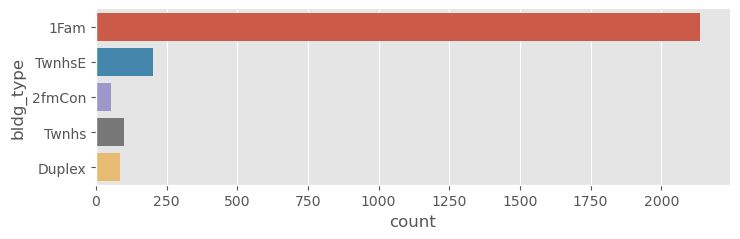

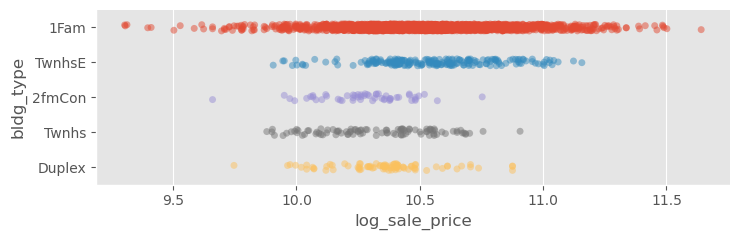

In [350]:
nominal('bldg_type')

In [351]:
def get_dum(df, feat, drop):
    dum = pd.get_dummies(df[feat]).drop(drop, axis=1)
    dum.columns = [feat + '_' + x.lower() for x in dum.columns]
    return dum

In [352]:
df = pd.concat([df, get_dum(df, 'bldg_type', '1Fam')], axis=1).drop('bldg_type', axis=1)

## House Style

1Story    1287
2Story     772
1.5Fin     283
SLvl       118
SFoyer      70
2.5Unf      22
1.5Unf      19
2.5Fin       6
Name: house_style, dtype: int64


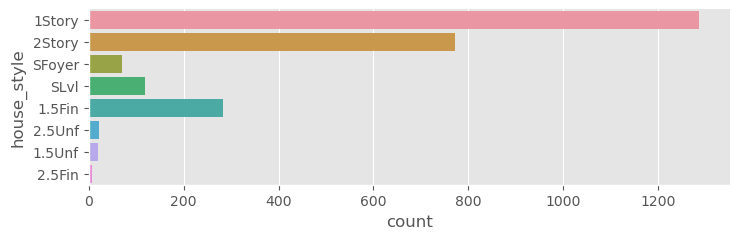

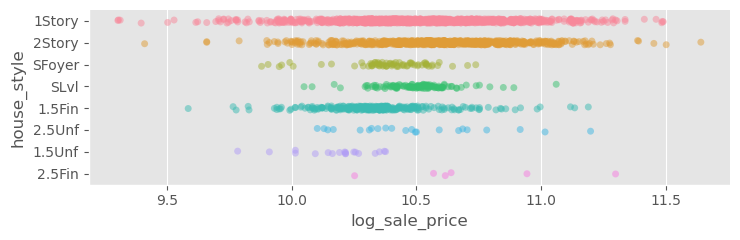

In [353]:
nominal('house_style')

In [354]:
df = pd.concat([df, get_dum(df, 'house_style', '1Story')], axis=1).drop('house_style', axis=1)

## Roof Style

Gable      2057
Hip         472
Gambrel      18
Flat         16
Mansard      10
Shed          4
Name: roof_style, dtype: int64


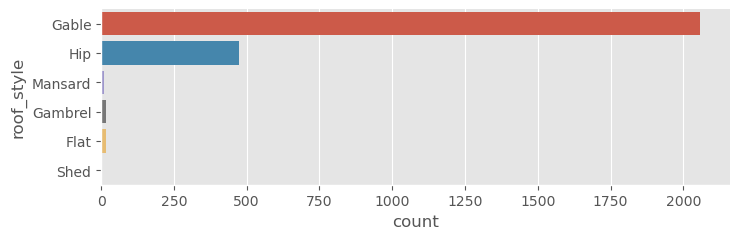

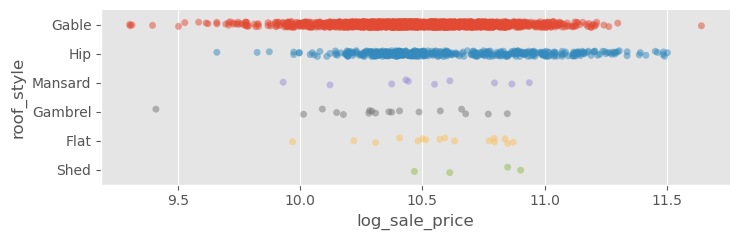

In [355]:
nominal('roof_style')

In [356]:
df = pd.concat([df, get_dum(df, 'roof_style', 'Gable')], axis=1).drop('roof_style', axis=1)

## Roof Material

CompShg    2541
Tar&Grv      18
WdShake       8
WdShngl       7
Metal         1
Roll          1
Membran       1
Name: roof_matl, dtype: int64


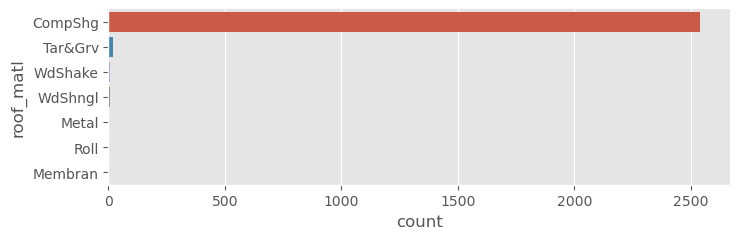

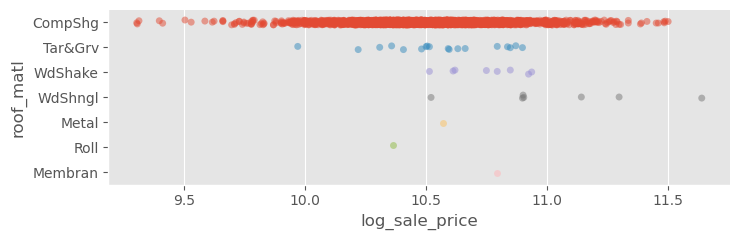

In [357]:
nominal('roof_matl')

In [358]:
df = pd.concat([df, get_dum(df, 'roof_matl', 'CompShg')], axis=1).drop('roof_matl', axis=1)

## *Exterior 1st/2nd

In [359]:
pd.DataFrame(df[['exterior1st', 'exterior2nd']].value_counts()).T

exterior1st VinylSd MetalSd HdBoard Wd Sdng Plywood CemntBd BrkFace HdBoard  \
exterior2nd VinylSd MetalSd HdBoard Wd Sdng Plywood CmentBd BrkFace Plywood   
0               850     395     359     332     159      94      43      40   

exterior1st WdShing Stucco AsbShng BrkFace Wd Sdng Plywood Wd Sdng VinylSd  \
exterior2nd Wd Shng Stucco AsbShng Wd Sdng Plywood Brk Cmn Wd Shng Wd Shng   
0                38     27      27      19      19      18      17       9   

exterior1st WdShing BrkFace Plywood HdBoard Wd Sdng HdBoard  Stucco Plywood  \
exterior2nd Plywood Plywood HdBoard ImStucc HdBoard Wd Shng Wd Shng Wd Sdng   
0                 8       7       6       6       6       5       4       4   

exterior1st         BrkFace Wd Sdng AsbShng BrkComm MetalSd BrkFace        \
exterior2nd ImStucc MetalSd MetalSd Plywood Brk Cmn HdBoard HdBoard Stone   
0                 4       3       3       3       3       3       3     3   

exterior1st AsphShn VinylSd Wd Sdng VinylSd Wd Sdng  Stucco WdShing MetalSd  \
exterior2nd AsphShn Wd Sdng  Stucco MetalSd VinylSd Wd Sdng HdBoard Wd Sdng   
0                 2       2       2       2       2       2       2       2   

exterior1st                HdBoard WdShing Wd Sdng AsbShng VinylSd CemntBd  \
exterior2nd VinylSd Stucco Wd Sdng Wd Sdng BrkFace  Stucco  Stucco Wd Shng   
0                 2      2       2       2       1       1       1       1   

exterior1st Wd Sdng ImStucc CemntBd Wd Sdng BrkFace  CBlock        BrkFace  \
exterior2nd AsbShng ImStucc Wd Sdng ImStucc AsbShng VinylSd CBlock  Stucco   
0                 1       1       1       1       1       1      1       1   

exterior1st WdShing VinylSd HdBoard VinylSd HdBoard MetalSd HdBoard MetalSd  \
exterior2nd  Stucco Plywood AsphShn ImStucc BrkFace  CBlock  Stucco Wd Shng   
0                 1       1       1       1       1       1       1       1   

exterior1st AsbShng Plywood BrkComm HdBoard BrkComm Plywood VinylSd PreCast  \
exterior2nd CmentBd  CBlock  Stucco MetalSd Wd Sdng Wd Shng HdBoard PreCast   
0                 1       1       1       1       1       1       1       1   

exterior1st  Stucco                       AsbShng MetalSd VinylSd Plywood  
exterior2nd BrkFace CmentBd Plywood Stone Wd Sdng AsphShn AsbShng VinylSd  
0                 1       1       1     1       1       1       1       1

VinylSd    868
HdBoard    416
MetalSd    407
Wd Sdng    384
Plywood    194
CemntBd     96
BrkFace     80
WdShing     51
Stucco      37
AsbShng     33
BrkComm      5
AsphShn      2
CBlock       2
ImStucc      1
PreCast      1
Name: exterior1st, dtype: int64


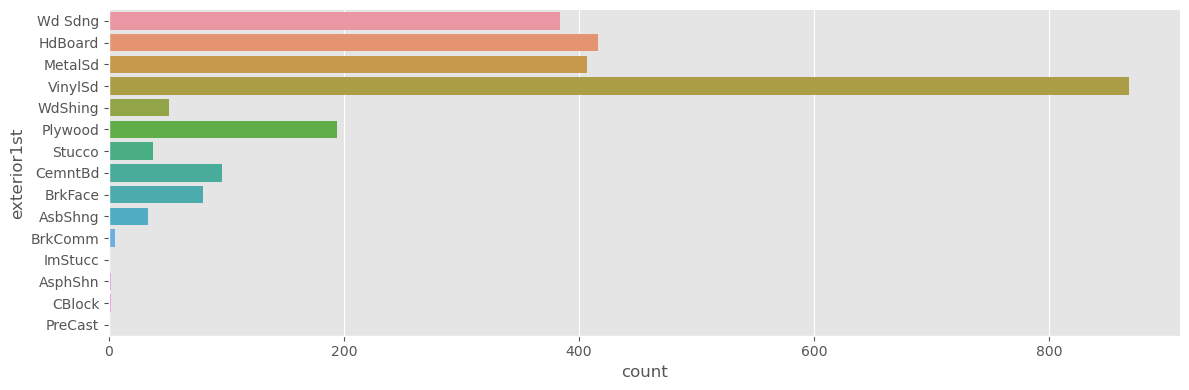

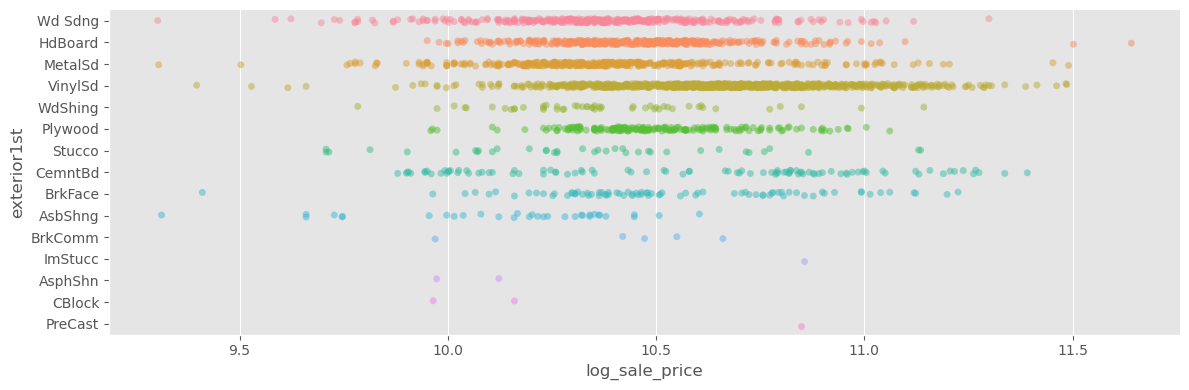

In [360]:
nominal('exterior1st', height = 4)

In [361]:
df = pd.concat([df, get_dum(df, 'exterior1st', 'VinylSd')], axis=1).drop('exterior1st', axis=1)

VinylSd    856
MetalSd    404
HdBoard    380
Wd Sdng    368
Plywood    238
CmentBd     96
Wd Shng     76
BrkFace     46
Stucco      37
AsbShng     30
Brk Cmn     21
ImStucc     13
AsphShn      4
Stone        4
CBlock       3
PreCast      1
Name: exterior2nd, dtype: int64


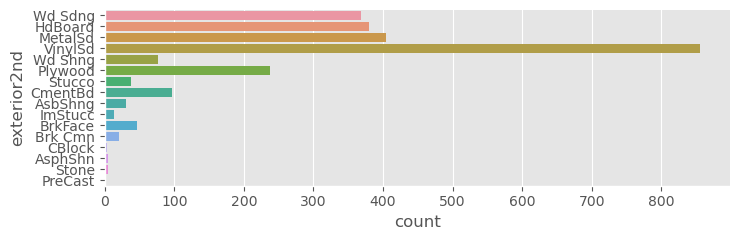

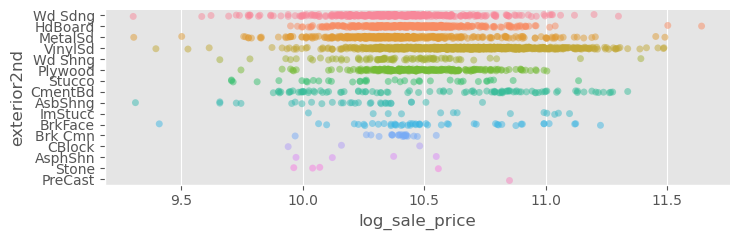

In [362]:
nominal('exterior2nd')

In [363]:
df = pd.concat([df, get_dum(df, 'exterior2nd', 'VinylSd')], axis=1).drop('exterior2nd', axis=1)

## Masonry Veneer Type

None       1571
BrkFace     804
Stone       182
BrkCmn       20
Name: mas_vnr_type, dtype: int64


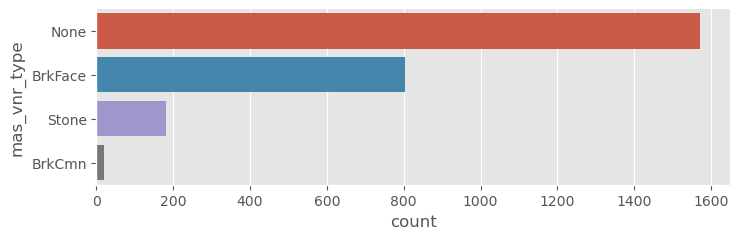

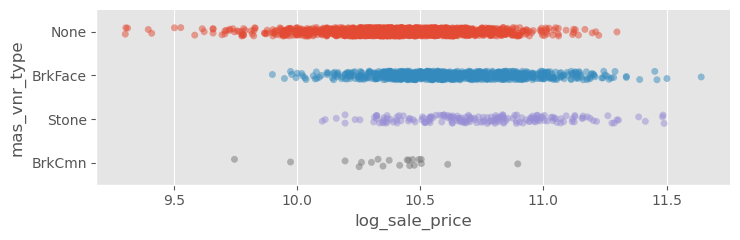

In [364]:
nominal('mas_vnr_type')

In [365]:
df = pd.concat([df, get_dum(df, 'mas_vnr_type', 'None')], axis=1).drop('mas_vnr_type', axis=1)

## Foundation

CBlock    1139
PConc     1104
BrkTil     277
Slab        42
Stone       10
Wood         5
Name: foundation, dtype: int64


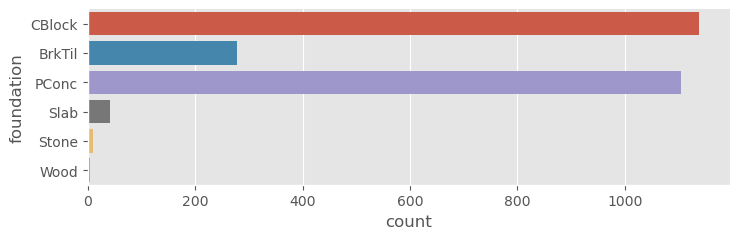

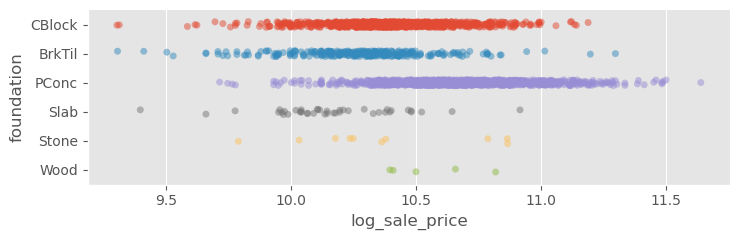

In [366]:
nominal('foundation')

In [367]:
df = pd.concat([df, get_dum(df, 'foundation', 'CBlock')], axis=1).drop('foundation', axis=1)

## Heating

GasA     2537
GasW       25
Grav        7
Wall        5
OthW        2
Floor       1
Name: heating, dtype: int64


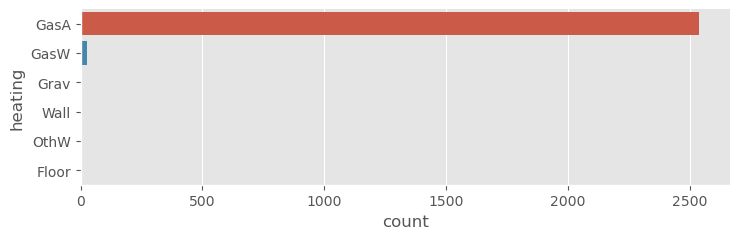

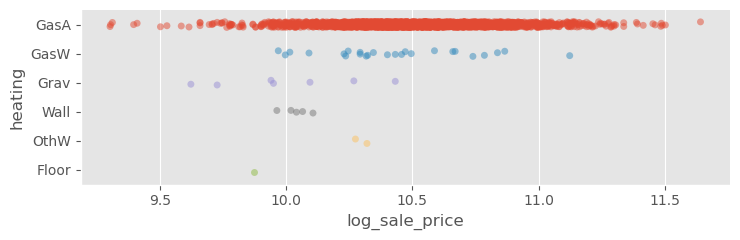

In [368]:
nominal('heating')

In [369]:
df = pd.concat([df, get_dum(df, 'heating', 'GasA')], axis=1).drop('heating', axis=1)

## Central Air

Y    2415
N     162
Name: central_air, dtype: int64


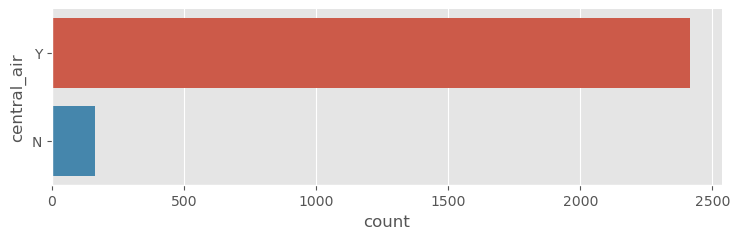

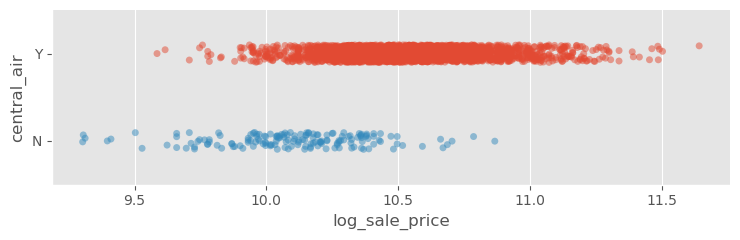

In [370]:
nominal('central_air')

In [371]:
df['central_air'] = np.where(df['central_air'] == 'Y', 1, 0)

## Garage Type

Attchd     1526
Detchd      715
BuiltIn     152
NA          127
Basment      27
2Types       21
CarPort       9
Name: garage_type, dtype: int64


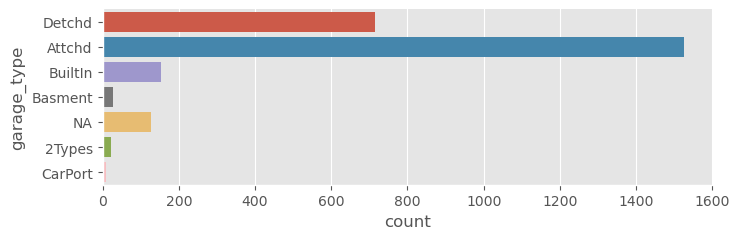

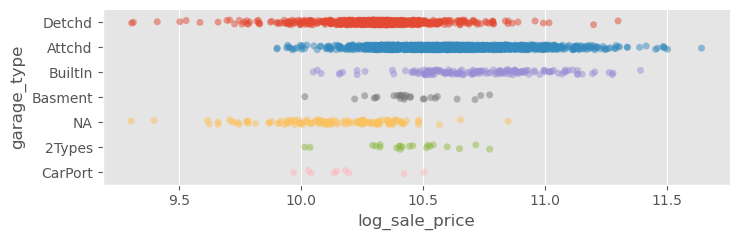

In [372]:
nominal('garage_type')

In [373]:
df = pd.concat([df, get_dum(df, 'garage_type', 'Attchd')], axis=1).drop('garage_type', axis=1)

## Misc Feature

NA      2480
Shed      88
Gar2       5
Othr       3
TenC       1
Name: misc_feature, dtype: int64


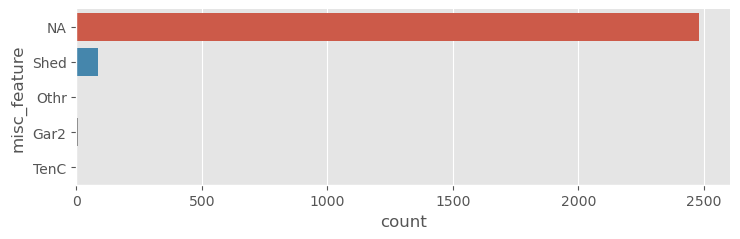

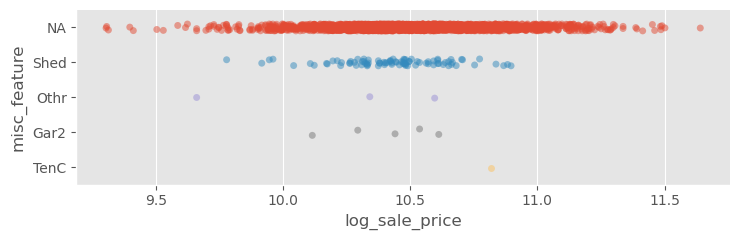

In [374]:
nominal('misc_feature')

In [375]:
df = pd.concat([df, get_dum(df, 'misc_feature', 'NA')], axis=1).drop('misc_feature', axis=1)

## Sale Type

WD       2390
New        78
COD        50
ConLD      23
CWD        11
ConLw       8
ConLI       7
Con         5
Oth         4
VWD         1
Name: sale_type, dtype: int64


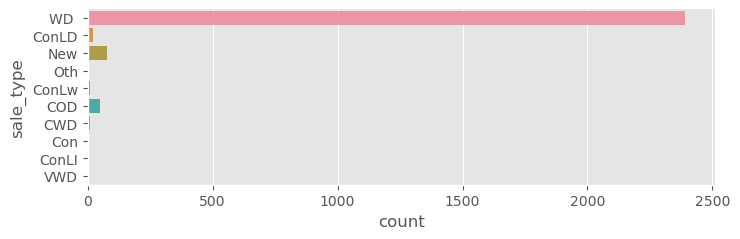

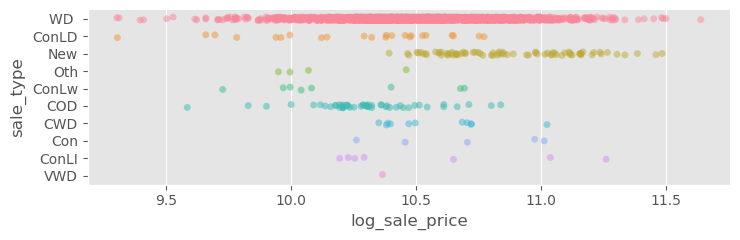

In [376]:
nominal('sale_type')

In [377]:
df = pd.concat([df, get_dum(df, 'sale_type', 'WD ')], axis=1).drop('sale_type', axis=1)

## Sale Condition

Normal     2413
Partial      81
Abnorml      60
Family       17
Alloca        4
AdjLand       2
Name: sale_condition, dtype: int64


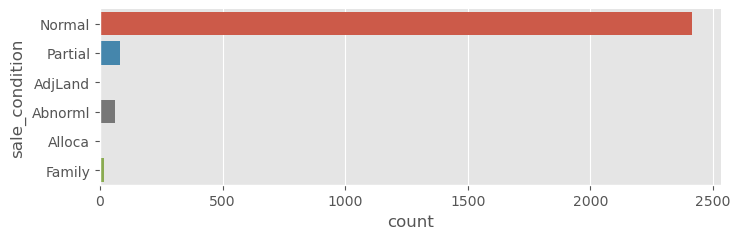

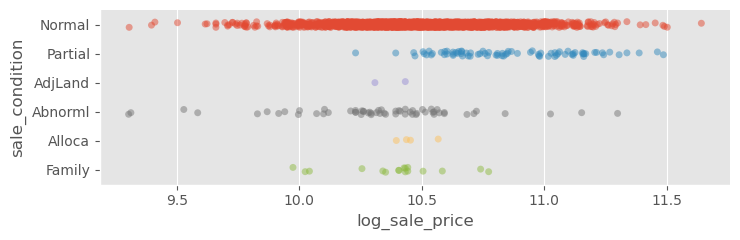

In [378]:
nominal('sale_condition')

In [379]:
df = pd.concat([df, get_dum(df, 'sale_condition', 'Normal')], axis=1).drop('sale_condition', axis=1)

## MS Sub Class

In [380]:
df['ms_sub_class'] = df['ms_sub_class'].astype(str)

20     939
60     501
50     258
120    169
30     122
160    120
70     116
80     109
90      87
190     53
85      43
75      21
45      17
180     15
40       6
150      1
Name: ms_sub_class, dtype: int64


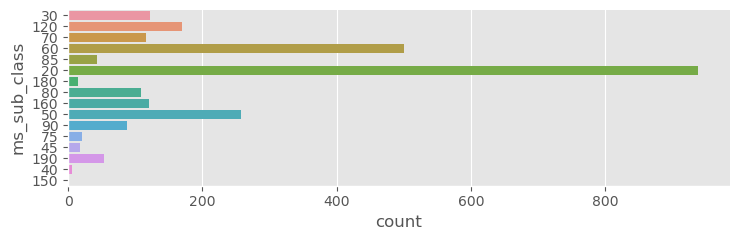

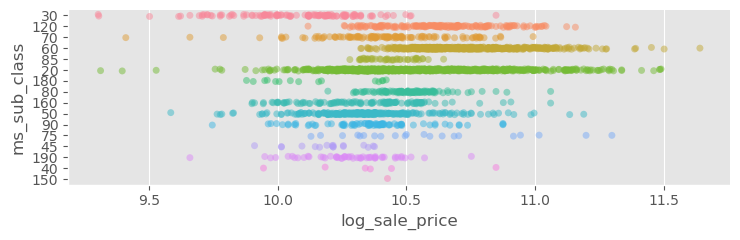

In [381]:
nominal('ms_sub_class')

In [382]:
df = pd.concat([df, get_dum(df, 'ms_sub_class', '20')], axis=1).drop('ms_sub_class', axis=1)

## MS Zoning

RL         2006
RM          417
FV          113
RH           21
C (all)      17
I (all)       2
A (agr)       1
Name: ms_zoning, dtype: int64


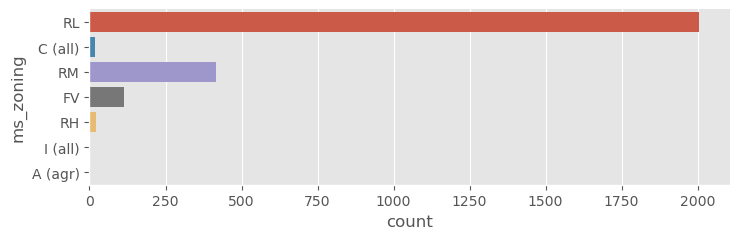

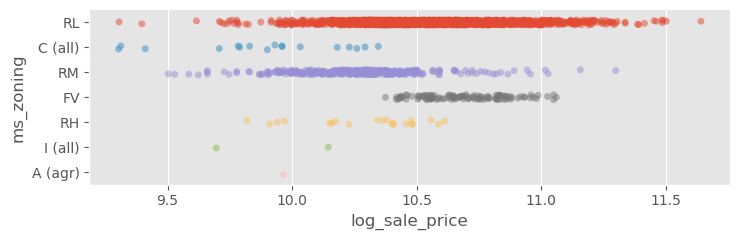

In [383]:
nominal('ms_zoning')

In [384]:
df = pd.concat([df, get_dum(df, 'ms_zoning', 'RL')], axis=1).drop('ms_zoning', axis=1)

# Feature reduction
## Removing features with low variance

In [385]:
df_X = df.drop(['pid', 'sale_price', 'log_sale_price'], axis=1)
df_y = df['log_sale_price']

In [414]:
pd.set_option('display.max_rows', None)

print(df_X.shape)
df_X.var().sort_values(key=abs).head(80)

(2577, 139)


garage_type_basment       0.010372
neighborhood_brdale       0.011131
exterior2nd_asbshng       0.011510
exterior1st_asbshng       0.012647
neighborhood_meadowv      0.013025
exterior2nd_stucco        0.014157
exterior1st_stucco        0.014157
neighborhood_clearcr      0.015287
foundation_slab           0.016039
neighborhood_swisu        0.016039
neighborhood_stonebr      0.016414
ms_sub_class_85           0.016414
exterior2nd_brkface       0.017538
sale_type_cod             0.019033
exterior1st_wdshing       0.019406
land_contour_low          0.019779
ms_sub_class_190          0.020151
bldg_type_2fmcon          0.020523
neighborhood_timber       0.020523
near_pos                  0.021267
sale_condition_abnorml    0.022750
alley_pave                0.023859
neighborhood_noridge      0.025333
house_style_sfoyer        0.026436
exterior2nd_wd shng       0.028633
neighborhood_idotrr       0.028633
sale_type_new             0.029363
lot_config_fr2            0.029363
exterior1st_brkface 

In [387]:
var_filter = df_X.var()>.01

In [388]:
df_X = df_X.loc[:, var_filter]
df_X

gr_liv_area  lot_frontage  lot_area  lot_shape  land_slope  \
0             856          80.0      7890          4           3   
1            1049          42.0      4235          4           3   
2            1001          60.0      6060          4           3   
3            1039          80.0      8146          4           3   
4            1665          70.0      8400          4           3   
...           ...           ...       ...        ...         ...   
2572          952          65.0      8854          4           3   
2573         1733          49.0     13680          3           3   
2574         2002          82.0      6270          4           3   
2575         1842          65.0      8826          4           3   
2576         1911          80.0      9554          3           3   

      overall_qual  overall_cond  year_built  year_remod_add  mas_vnr_area  \
0                6             6        1939            1950           0.0   
1                5             5        1984            1984         149.0   
2                5             9        1930            2007           0.0   
3                4             8        1900            2003           0.0   
4                8             6        2001            2001           0.0   
...            ...           ...         ...             ...           ...   
2572             6             6        1916            1950           0.0   
2573             3             5        1955            1955           0.0   
2574             5             6        1949            1950           0.0   
2575             7             5        2000            2000         144.0   
2576             8             5        1993            1994         125.0   

      exter_qual  exter_cond  bsmt_qual  bsmt_cond  bsmt_exposure  \
0              3           3          3          3              1   
1              4           3          4          3              2   
2              4           3          3          3              1   
3              4           4          2          3              1   
4              4           3          4          3              1   
...          ...         ...        ...        ...            ...   
2572           3           3          3          3              1   
2573           3           3          0          0              0   
2574           3           3          3          3              1   
2575           4           3          4          3              1   
2576           4           3          4          3              1   

      bsmt_fin_type1  bsmt_fin_sf1  bsmt_fin_type2  bsmt_fin_sf2  bsmt_unf_sf  \
0                  3         238.0               1           0.0        618.0   
1                  6         552.0               5         393.0        104.0   
2                  5         737.0               1           0.0        100.0   
3                  1           0.0               1           0.0        405.0   
4                  6         643.0               1           0.0        167.0   
...              ...           ...             ...           ...          ...   
2572               1           0.0               1           0.0        952.0   
2573               0           0.0               0           0.0          0.0   
2574               4         284.0               1           0.0        717.0   
2575               6         841.0               1           0.0        144.0   
2576               6         380.0               1           0.0        397.0   

      total_bsmt_sf  heating_qc  central_air  electrical  1st_flr_sf  \
0             856.0           3            1           4         856   
1            1049.0           3            1           4        1049   
2             837.0           5            1           4        1001   
3             405.0           4            1           4         717   
4             810.0           5            1           4         810   
...             ..

In [401]:
df_all = pd.concat([df_X,df_y], axis=1)

In [404]:
mask = np.triu(np.ones_like(df_all.corr(), dtype=bool))
tri_df = df_all.corr().mask(mask)

In [406]:
[c for c in tri_df.columns if any(tri_df[c] > 0.8)]

['gr_liv_area',
 'overall_qual',
 'bsmt_fin_type2',
 '2nd_flr_sf',
 'fireplaces',
 'garage_cars',
 'garage_qual',
 'pool_area',
 'neighborhood_somerst',
 'bldg_type_2fmcon',
 'bldg_type_duplex',
 'house_style_1.5fin',
 'house_style_slvl',
 'exterior1st_asbshng',
 'exterior1st_cemntbd',
 'exterior1st_hdboard',
 'exterior1st_metalsd',
 'exterior1st_wd sdng',
 'sale_type_new']

In [434]:
tri_df.abs().unstack().sort_values(ascending=False)

bldg_type_duplex        ms_sub_class_90           1.000000
sale_type_new           sale_condition_partial    0.980718
exterior1st_cemntbd     exterior2nd_cmentbd       0.978361
bldg_type_2fmcon        ms_sub_class_190          0.971412
exterior1st_metalsd     exterior2nd_metalsd       0.969280
house_style_slvl        ms_sub_class_80           0.959354
garage_cond             garage_type_na            0.942503
garage_qual             garage_cond               0.940100
                        garage_type_na            0.933773
house_style_1.5fin      ms_sub_class_50           0.928974
garage_cars             garage_area               0.889768
exterior1st_hdboard     exterior2nd_hdboard       0.885422
neighborhood_somerst    ms_zoning_fv              0.883509
exterior1st_wd sdng     exterior2nd_wd sdng       0.863266
fireplaces              fireplace_qu              0.859557
exterior1st_asbshng     exterior2nd_asbshng       0.856375
pool_area               pool_qc                   0.8272

In [409]:
df_all[[c for c in tri_df.columns if any(tri_df[c] > 0.95)]].corr()

bldg_type_2fmcon  bldg_type_duplex  house_style_slvl  \
bldg_type_2fmcon             1.000000         -0.027346         -0.019087   
bldg_type_duplex            -0.027346          1.000000         -0.030668   
house_style_slvl            -0.019087         -0.030668          1.000000   
exterior1st_cemntbd         -0.028778         -0.036769         -0.013683   
exterior1st_metalsd          0.062935          0.001529         -0.054145   
sale_type_new               -0.025847         -0.033024         -0.038701   

                     exterior1st_cemntbd  exterior1st_metalsd  sale_type_new  
bldg_type_2fmcon               -0.028778             0.062935      -0.025847  
bldg_type_duplex               -0.036769             0.001529      -0.033024  
house_style_slvl               -0.013683            -0.054145      -0.038701  
exterior1st_cemntbd             1.000000            -0.085190       0.072888  
exterior1st_metalsd            -0.085190             1.000000      -0.051669  
sale_type_new                   0.072888            -0.051669       1.000000

In [431]:
df_all.corr().abs().unstack().sort_values(ascending=False)

gr_liv_area             gr_liv_area               1.000000
open_porch_sf           open_porch_sf             1.000000
fence                   fence                     1.000000
pool_qc                 pool_qc                   1.000000
pool_area               pool_area                 1.000000
screen_porch            screen_porch              1.000000
3_ssn_porch             3_ssn_porch               1.000000
enclosed_porch          enclosed_porch            1.000000
wood_deck_sf            wood_deck_sf              1.000000
mo_sold                 mo_sold                   1.000000
paved_drive             paved_drive               1.000000
garage_cond             garage_cond               1.000000
garage_qual             garage_qual               1.000000
garage_area             garage_area               1.000000
garage_cars             garage_cars               1.000000
garage_finish           garage_finish             1.000000
misc_val                misc_val                  1.0000

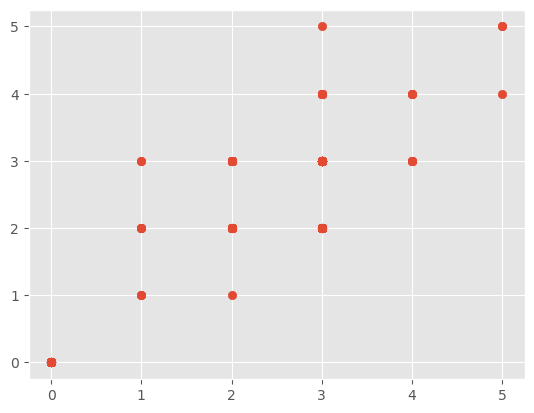

In [420]:
plt.scatter(data=df, x='garage_cond', y='garage_qual')
plt.show()

In [427]:
from sklearn.feature_selection import SelectKBest, f_regression
k = 5
X_new = SelectKBest(f_regression, k=k).fit_transform(df_X, df_y)
selected_features = df_X.columns[SelectKBest(f_regression, k=k).fit(df_X,df_y).get_support()]
print(selected_features)



Index(['gr_liv_area', 'overall_qual', 'exter_qual', 'garage_cars',
       'garage_area'],
      dtype='object')


In [428]:
pd.DataFrame(X_new).corr()

0         1         2         3         4
0  1.000000  0.557935  0.413221  0.495808  0.477634
1  0.557935  1.000000  0.713664  0.581484  0.539986
2  0.413221  0.713664  1.000000  0.497705  0.473883
3  0.495808  0.581484  0.497705  1.000000  0.889768
4  0.477634  0.539986  0.473883  0.889768  1.000000

In [429]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(df_X.values, i) for i in range(df_X.shape[1])]
vif_info['Column'] = df_X.columns
vif_info.sort_values('VIF', ascending=False)

def feature_reducer(df, vif = 10)

/Users/austinmccollum/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


VIF                  Column
0             inf             gr_liv_area
87            inf        bldg_type_duplex
136           inf         ms_sub_class_90
26            inf         low_qual_fin_sf
25            inf              2nd_flr_sf
24            inf              1st_flr_sf
20            inf           total_bsmt_sf
19            inf             bsmt_unf_sf
16            inf            bsmt_fin_sf1
18            inf            bsmt_fin_sf2
54   6.902548e+04                 yr_sold
7    5.445853e+04              year_built
8    2.737839e+04          year_remod_add
4    2.755881e+02              land_slope
42   2.517895e+02             garage_cond
41   2.190884e+02             garage_qual
23   1.583236e+02              electrical
35   1.523180e+02              functional
10   1.243753e+02              exter_qual
32   1.218226e+02          kitchen_abv_gr
11   9.412876e+01              exter_cond
34   9.185978e+01         tot_rms_abv_grd
5    8.835218e+01            overall_qual
13   8.715212e+01               bsmt_cond
12   8.372087e+01               bsmt_qual
33   8.057761e+01            kitchen_qual
3    6.192113e+01               lot_shape
6    5.869915e+01            overall_cond
43   5.292687e+01             paved_drive
39   4.657782e+01             garage_cars
31   4.012151e+01          bedroom_abv_gr
40   3.895575e+01             garage_area
21   3.735901e+01              heating_qc
91   3.322901e+01      house_style_2story
29   3.014402e+01               full_bath
97   2.971028e+01     exterior1st_cemntbd
106  2.946387e+01     exterior2nd_cmentbd
22   2.878966e+01             central_air
126  2.830728e+01  sale_condition_partial
124  2.824716e+01           sale_type_new
1    2.622452e+01            lot_frontage
99   2.602208e+01     exterior1st_metalsd
108  2.536128e+01     exterior2nd_metalsd
129  2.071175e+01        ms_sub_class_190
89   2.047170e+01        bldg_type_twnhse
86   2.021562e+01        bldg_type_2fmcon
132  2.013362e+01         ms_sub_class_60
93   1.840808e+01        house_style_slvl
134  1.773008e+01         ms_sub_class_80
127  1.690954e+01        ms_sub_class_120
121  1.483961e+01          garage_type_na
128  1.439253e+01        ms_sub_class_160
90   1.388358e+01      house_style_1.5fin
98   1.340561e+01     exterior1st_hdboard
131  1.326689e+01         ms_sub_class_50
102  1.278586e+01     exterior1st_wd sdng
38   1.259260e+01           garage_finish
107  1.205801e+01     exterior2nd_hdboard
15   1.182782e+01          bsmt_fin_type1
111  1.165940e+01     exterior2nd_wd sdng
88   1.048924e+01         bldg_type_twnhs
37   9.975767e+00            fireplace_qu
36   9.266164e+00              fireplaces
17   9.004691e+00          bsmt_fin_type2
14   7.011889e+00           bsmt_exposure
80   6.784334e+00    neighborhood_somerst
53   6.749298e+00                 mo_sold
109  6.110766e+00     exterior2nd_plywood
116  5.853835e+00        foundation_pconc
137  5.835057e+00            ms_zoning_fv
133  5.549477e+00         ms_sub_class_70
100  5.458121e+00     exterior1st_plywood
76   4.945188e+00    neighborhood_oldtown
92   4.920389e+00      house_style_sfoyer
95   4.783102e+00     exterior1st_asbshng
104  4.638430e+00     exterior2nd_asbshng
2    4.524437e+00                lot_area
138  4.460667e+00            ms_zoning_rm
30   4.178100e+00               half_bath
27   4.112681e+00          bsmt_full_bath
135  3.980515e+00         ms_sub_class_85
96   3.931751e+00     exterior1st_brkface
113  3.561289e+00    mas_vnr_type_brkface
50   3.514197e+00                 pool_qc
49   3.482782e+00               pool_area
9    3.479842e+00            mas_vnr_area
120  3.300587e+00      garage_type_detchd
105  3.021107e+00     exterior2nd_brkface
101  2.973737e+00      exterior1st_stucco
110  2.876002e+00      exterior2nd_stucco
112  2.845027e+00     exterior2nd_wd shng
66   2.768856e+00    neighborhood_collgcr
71   2.718011e+00    neighborhood_meadowv
103  2.635770e+00     exterior1st_wdshing
75   2.578109e+00    nei

In [ ]:
df_X[]

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

np.random.seed(0)

# Create X and y arrays
X = df_dum.drop(['log_sale_price','sale_price'], axis=1)
y = df_dum['log_sale_price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y)

kf = KFold(n_splits=5, shuffle=True)

# Set up the parameter grid
# param_grid = {"alpha": np.linspace(0.00001, 1, 20)}
param_grid = {"alpha": np.array([.00001, .0001, .001, .01, .1, 1, 10, 100, 1000, 10000, 100000])}

# Instantiate lasso_cv
lasso = Lasso()
lasso_cv = GridSearchCV(lasso, param_grid, cv=kf)

# Fit to the training data
lasso_cv.fit(X_train, y_train)
print("Tuned lasso paramaters: {}".format(lasso_cv.best_params_))
print("Tuned lasso score: {}".format(lasso_cv.best_score_))

In [ ]:
np.array([.00001, .0001, .001, .01, .1, 1, 10, 100, 1000, 10000, 100000])

In [ ]:
df_dum.corr()